In [32]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [6]:

# read in video game stats file
df = df_original = pd.read_csv('Video_Games.csv')
df.head()


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:

# check for missing data
df.isnull().sum()


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [19]:

def fill_cols(col):
    encoder = LabelEncoder()
    # get indices with values and fit label encoder
    idx = ~df[col].isna()
    encoder.fit(pd.Series(df[col][idx]))
    encoder.fit_transform(df[col][idx])
    df[col] = df[col].apply(lambda x: encoder.transform([x])[0] if type(x) == str else x)
    # fill in missing values with column mean
    df[col].fillna(df[col].mean(), inplace=True)


In [26]:

df = df.dropna(subset=['Name', 'Genre', 'Year_of_Release', 'Publisher'])
df['Critic_Score'] = df['Critic_Score'].fillna(df['Critic_Score'].mean())
df['Critic_Count'] = df['Critic_Count'].fillna(df['Critic_Count'].mean())
df['User_Count'] = df['User_Count'].fillna(df['User_Count'].mean())

for col in ['User_Score','Developer','Rating']:
    fill_cols(col)

df.isnull().sum()


Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

In [31]:

# use encoder to transform remaining non-numeric cols
to_encode = ['Name','Platform','Genre','Publisher']
encoder = LabelEncoder()

for col in to_encode:
    df[col] = encoder.fit_transform(df[col]).astype('float64')

# df.to_csv("encoded_dataframe.csv")
df



,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,10919.0,26.0,2006.0,10.0,361.0,41.36,28.96,3.77,8.45,82.53,76.000000,51.000000,77.000000,322.000000,1008.000000,1.000000
1,9265.0,11.0,1985.0,4.0,361.0,29.08,3.58,6.81,0.77,40.24,68.997119,26.440992,74.727254,163.008846,835.050081,3.558616
2,5534.0,26.0,2008.0,6.0,361.0,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,80.000000,709.000000,1008.000000,1.000000
3,10921.0,26.0,2009.0,10.0,361.0,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000,77.000000,192.000000,1008.000000,1.000000
4,7294.0,5.0,1996.0,7.0,361.0,11.27,8.89,10.22,1.00,31.37,68.997119,26.440992,74.727254,163.008846,835.050081,3.558616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,8236.0,17.0,2016.0,0.0,502.0,0.00,0.00,0.01,0.00,0.01,68.997119,26.440992,74.727254,163.008846,835.050081,3.558616
16715,5084.0,28.0,2006.0,10.0,91.0,0.00,0.01,0.00,0.00,0.01,68.997119,26.440992,74.727254,163.008846,835.050081,3.558616
16716,3828.0,20.0,2016.0,1.0,233.0,0.00,0.00,0.01,0.00,0.01,68.997119,26.440992,74.727254,163.008846,835.050081,3.558616
16717,8913.0,6.0,2003.0,4.0,547.0,0.01,0.00,0.00,0.00,0.01,68.997119,26.440992,74.727254,163.008846,835.050081,3.558616


In [29]:

# split into feature columns and sales columns (y vars.)
sales = [name for name in list(df.columns) if 'Sales' in name]
feats = [name for name in list(df.columns) if name not in sales]

y_cols = df[sales]
x_cols = df[feats]

df['Global_Sales'].describe()


count    16416.000000
mean         0.536708
std          1.559885
min          0.010000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.530000
Name: Global_Sales, dtype: float64

## split into test and train sets

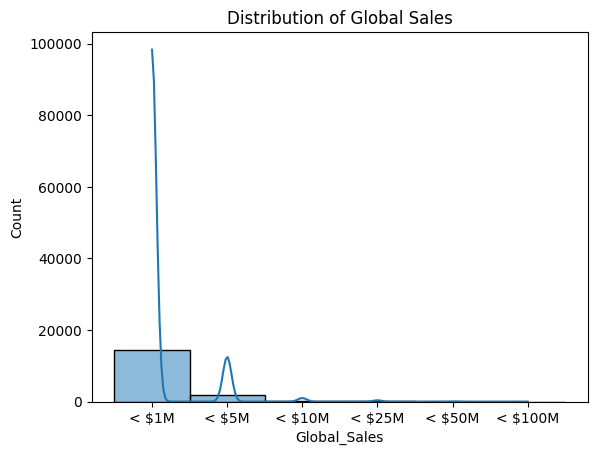

In [34]:

# cuts = [float('-inf'), 0, 0.5, 1, 5, 10, 25, 50, 100]
cuts = [0, 1, 5, 10, 25, 50, 100]

labels = [f"< ${c}M" for c in cuts][1:]
y = pd.cut(y_cols['Global_Sales'], bins=cuts, labels=labels)

x_train, x_test, y_train, y_test = train_test_split(x_cols, y, test_size=0.2)

# Plot histogram
sns.histplot(data=y, kde = True)
plt.title('Distribution of Global Sales')

plt.show()


In [25]:

y_train.head()


12072    < $1M in sales
5311     < $1M in sales
533      < $5M in sales
13816    < $1M in sales
6701     < $1M in sales
Name: Global_Sales, dtype: category
Categories (6, object): ['< $1M in sales' < '< $5M in sales' < '< $10M in sales' < '< $25M in sales' < '< $50M in sales' < '< $100M in sales']